<a href="https://colab.research.google.com/github/jateenbhagat02/SpwPdw/blob/main/Multi_var_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('HousingData.csv').drop(columns=['date','street','city','statezip','country'])
print(df.head())

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0     0          3        1340              0      1955          2005  
1     4          5        3370            280      1921             0  
2     0          4        1930              0      1966             0  
3     0          4        1000           1000      1963             0  
4     0          4        1140            800      1976          1992  


In [6]:
print(df.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

In [7]:
print(df.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64


In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

<Axes: >

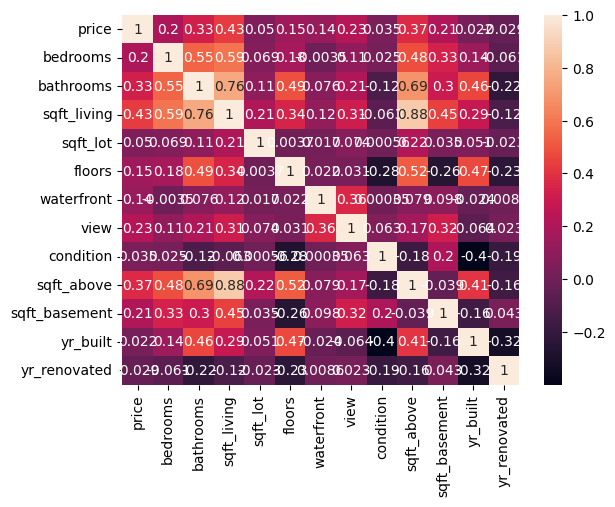

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']]

y = df[['price']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=20002)

In [37]:
lregr=LinearRegression()
lregr.fit(X_train,y_train)

LinearRegression()

In [38]:
coef_df=pd.DataFrame(lregr.coef_[0],X_train.columns)
coef_df


,0
bedrooms,-60988.024238
bathrooms,51718.627082
sqft_living,165.683164
sqft_lot,-0.778183
floors,41341.239507
waterfront,352780.934666
view,44576.794904
condition,29192.225339
sqft_above,94.131142
sqft_basement,71.552022


In [39]:
y_predict= lregr.predict(X_test)

(0.0, 3000000.0)

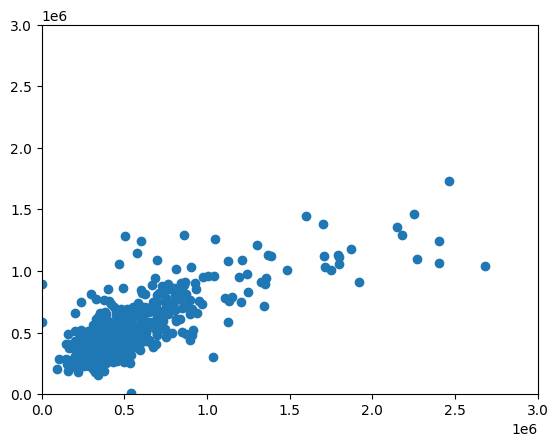

In [40]:
plt.scatter(y_test,y_predict)
plt.xlim(0,3000000)
plt.ylim(0,3000000)